In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/localpredictioncolumns/local_predictionColumns.csv


In [2]:
local = pd.read_csv(r'/kaggle/input/localpredictioncolumns/local_predictionColumns.csv', sep=';')

In [3]:
local.head()

,spachar,predNO2_Lin,predNO2_LinSep,predNO2_MEM,predNO2_UK,predNO2_UKSep,predicted_OK
0,3,-17.816501,24.645593,-8.445618,-12.820919,20.309784,34.779123
1,3,-22.784454,22.844755,-12.266293,-17.478720,17.685873,34.779123
2,3,-22.489242,22.853902,-11.977625,-17.170069,17.752225,34.779123
3,3,-21.622653,22.966727,-11.186443,-16.283202,18.024608,34.779123
4,3,-20.836868,23.160668,-10.495252,-15.469421,18.357900,34.779123


In [4]:
local = local.rename(columns ={"Unnamed: 0": "FID"  })

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def f(row):
    if row['spachar'] == 1:
        val = 'Urban'
    elif row['spachar'] == 2:
        val = 'LowPopulation'
    else:
        val = 'FarFromRoad'
    return val

In [7]:
local['SpatialGroup'] = local.apply(f, axis=1)

In [8]:
local

,spachar,predNO2_Lin,predNO2_LinSep,predNO2_MEM,predNO2_UK,predNO2_UKSep,predicted_OK,SpatialGroup
0,3,-17.816501,24.645593,-8.445618,-12.820919,20.309784,34.779123,FarFromRoad
1,3,-22.784454,22.844755,-12.266293,-17.478720,17.685873,34.779123,FarFromRoad
2,3,-22.489242,22.853902,-11.977625,-17.170069,17.752225,34.779123,FarFromRoad
3,3,-21.622653,22.966727,-11.186443,-16.283202,18.024608,34.779123,FarFromRoad
4,3,-20.836868,23.160668,-10.495252,-15.469421,18.357900,34.779123,FarFromRoad
...,...,...,...,...,...,...,...,...
63115,3,12.707355,24.943048,14.455480,13.678480,21.590008,34.779123,FarFromRoad
63116,2,12.218275,11.610603,14.032168,13.107108,13.869243,34.779123,LowPopulation
63117,2,14.833366,13.026097,15.999117,15.961407,15.444644,34.779123,LowPopulation
63118,2,13.344183,11.820000,14.540676,14.470513,14.107203,34.779123,LowPopulation


In [9]:
#drop irrelevant column
local = local.drop(columns=['spachar'], axis=1)

In [10]:
local_melt = pd.melt(local, id_vars=['SpatialGroup'], var_name=['Model'])

In [11]:
local_melt

,SpatialGroup,Model,value
0,FarFromRoad,predNO2_Lin,-17.816501
1,FarFromRoad,predNO2_Lin,-22.784454
2,FarFromRoad,predNO2_Lin,-22.489242
3,FarFromRoad,predNO2_Lin,-21.622653
4,FarFromRoad,predNO2_Lin,-20.836868
...,...,...,...
378715,FarFromRoad,predicted_OK,34.779123
378716,LowPopulation,predicted_OK,34.779123
378717,LowPopulation,predicted_OK,34.779123
378718,LowPopulation,predicted_OK,34.779123


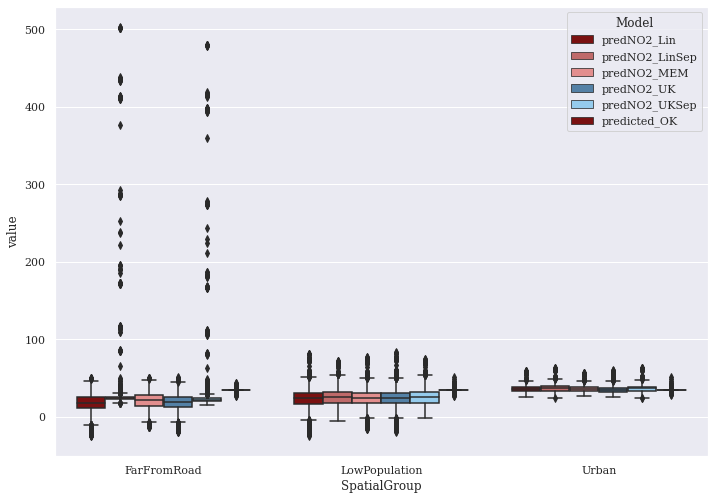

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#define font
plt.rcParams["font.family"] = "serif"

Model_colors=["darkred","indianred","lightcoral","steelblue","lightskyblue"]
ax = sns.boxplot(x="SpatialGroup", y="value", hue="Model", data=local_melt, palette=Model_colors)    

# plt.savefig('Distribution predicted NO2 per model', bbox_inches='tight',
#            facecolor=(1, 1, 1))

plt.show()

In [13]:
#Remove outliers (below 0 and above 85)
local_0_85 = local_melt[(local_melt['value'] > 0) & (local_melt['value'] < 85)]

In [14]:
local_0_85

,SpatialGroup,Model,value
59,LowPopulation,predNO2_Lin,2.825889
60,LowPopulation,predNO2_Lin,5.811782
61,FarFromRoad,predNO2_Lin,6.056129
62,FarFromRoad,predNO2_Lin,6.655928
63,FarFromRoad,predNO2_Lin,6.862862
...,...,...,...
378715,FarFromRoad,predicted_OK,34.779123
378716,LowPopulation,predicted_OK,34.779123
378717,LowPopulation,predicted_OK,34.779123
378718,LowPopulation,predicted_OK,34.779123


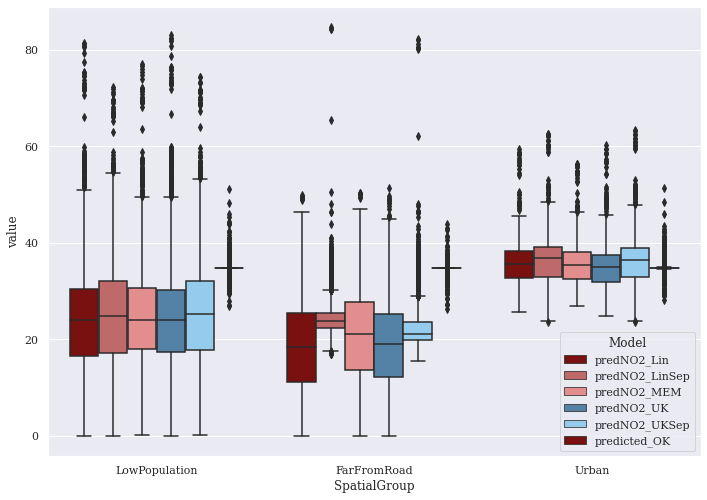

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#define font
plt.rcParams["font.family"] = "serif"

Model_colors=["darkred","indianred","lightcoral","steelblue","lightskyblue"]
ax = sns.boxplot(x="SpatialGroup", y="value", hue="Model", data=local_0_85, palette=Model_colors)    

# plt.savefig('Distribution predicted NO2 per model', bbox_inches='tight',
#            facecolor=(1, 1, 1))

plt.show()